In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as sla
import scipy.linalg as la
import scipy.stats
import numpy.matlib
import matplotlib.pyplot as plt
from  KitaevChain import *

In [2]:
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=9
plt.rcParams['axes.titlesize']=plt.rcParams['font.size']
plt.rcParams['figure.figsize']=(6.8,4)

# Benchmark

## Derivative of von Neumann entropy

In [3]:
mu_list=np.linspace(0,4,100)
shannon_entropy_mu_list=[]
spectrum_gap_list=[]
eigvallist=[]
for mu in mu_list:
    params=Params(mu=mu,Delta=0.1,L=400)
    shannon_entropy_mu_list.append(params.shannon_entropy(np.arange(10)))
    val=params.val
    spectrum_gap_list.append(np.max(val[val<0])-np.min(val[val>0]))
    eigvallist.append(val)

/home/jake/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [4]:
derivative=(np.array(shannon_entropy_mu_list[2:])-np.array(shannon_entropy_mu_list[:-2]))/(mu_list[1]-mu_list[0])

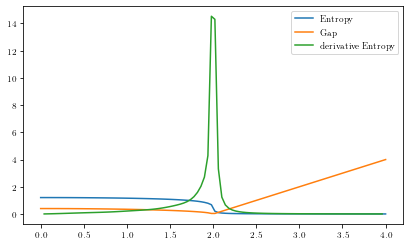

In [5]:
fig,ax=plt.subplots()

ax.plot(mu_list,shannon_entropy_mu_list,label='Entropy')
ax.plot(mu_list,np.abs(spectrum_gap_list),label='Gap')
ax.plot(mu_list[1:-1],np.abs(derivative),label='derivative Entropy')
ax.legend()

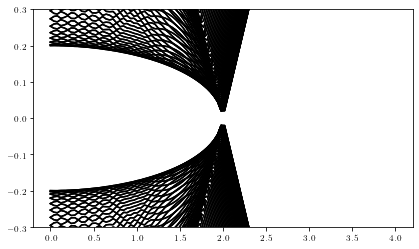

In [6]:
fig,ax=plt.subplots()
for index in range(eigvallist[0].shape[0]):
    ax.plot(mu_list,np.array(eigvallist)[:,index],'k')
    ax.set_ylim([-.3,.3])

In [7]:
Delta_list=np.linspace(0.1,2,20)
shannon_entropy_Delta_10_list=[]
shannon_entropy_Delta_30_list=[]
shannon_entropy_Delta_50_list=[]
shannon_entropy_Delta_70_list=[]

for Delta in Delta_list:
    params=Params(mu=0,Delta=Delta,L=400)
    shannon_entropy_Delta_10_list.append(params.shannon_entropy(np.arange(10)))
    shannon_entropy_Delta_30_list.append(params.shannon_entropy(np.arange(30)))
    shannon_entropy_Delta_50_list.append(params.shannon_entropy(np.arange(50)))
    shannon_entropy_Delta_70_list.append(params.shannon_entropy(np.arange(70)))

/home/jake/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


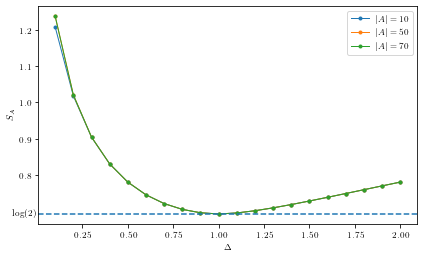

In [8]:
fig,ax=plt.subplots(figsize=(6.8,4))
ax.plot(Delta_list,shannon_entropy_Delta_10_list,'.-',label=r'$|A|=10$',lw=1,)
# ax.plot(Delta_list,shannon_entropy_Delta_30_list,label=r'$|A|=30$',lw=1)
ax.plot(Delta_list,shannon_entropy_Delta_50_list,'.-',label=r'$|A|=50$',lw=1)
ax.plot(Delta_list,shannon_entropy_Delta_70_list,'.-',label=r'$|A|=70$',lw=1)
ax.legend()
ax.set_xlabel(r'$\Delta$')
ax.set_ylabel(r'$S_A$')
ax.text(-.01,np.log(2),r'$\log(2)$',ha='right',va='center')
ax.set_yticks(np.arange(.8,1.3,0.1))
ax.axhline(y=np.log(2),ls='--')
# fig.savefig('/mnt/d/kitp/Rp_SPT/2/entropy_vs_Delta.pdf',bbox_inches='tight')

## von Neumann Entropy

In [70]:
def generate_A_dep(mu,shannon_entropy_list):
    subregion_max_list=np.arange(2,40)
    shannon_entropy_list[mu]=[]
    params=Params(mu=mu,Delta=1,L=400)
    for subregion_max in subregion_max_list:
        shannon_entropy_list[mu].append(params.shannon_entropy(np.arange(subregion_max)))

In [71]:
shannon_entropy_list={}
for i in (0,2,3,10):
    generate_A_dep(i,shannon_entropy_list)

/home/jake/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


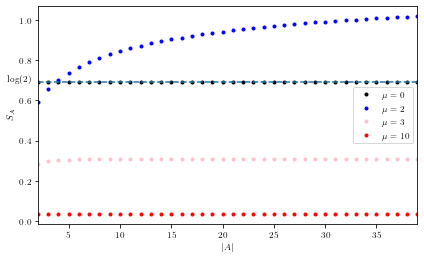

In [72]:
fig,ax=plt.subplots(figsize=(6.8,4))
subregion_max_list=np.arange(2,40)
for i,color in zip((0,2,3,10),('k','b','pink','red')):
    ax.plot(subregion_max_list,shannon_entropy_list[i],'.',label=r'$\mu={}$'.format((i)),color=color)
ax.legend()
# ax.plot(subregion_max_list,1/3*np.log(subregion_max_list))
ax.margins(x=0)
ax.axhline(y=np.log(2),ls='--')
ax.text(-1,np.log(2),r'$\log(2)$')
ax.set_xlabel(r'$|A|$')
ax.set_ylabel(r'$S_A$')

fig.savefig('/mnt/d/kitp/Rp_SPT/2/SA_vs_A_L_fixed.pdf',bbox_inches='tight')

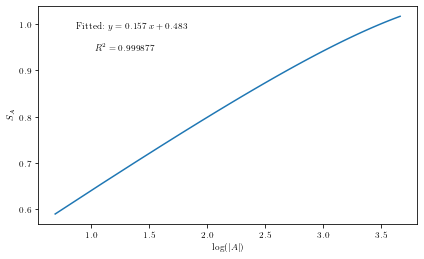

In [75]:
fig,ax=plt.subplots(figsize=(6.8,4))
ax.plot(np.log(subregion_max_list),(shannon_entropy_list[2]))
ax.set_xlabel(r'$\log(|A|)$')
ax.set_ylabel(r'$S_A$')
lr=scipy.stats.linregress(np.log(subregion_max_list)[:10],(shannon_entropy_list[2])[:10])
ax.text(0.1,0.9,r'Fitted: $y={:.3f}~x+ {:.3f}$'.format(lr.slope,lr.intercept),transform=ax.transAxes)
ax.text(0.15,0.8,r' $R^2={:f}$'.format(lr.rvalue),transform=ax.transAxes)
fig.savefig('/mnt/d/kitp/Rp_SPT/2/critical_exponent.pdf',bbox_inches='tight')

# Mutual information

In [76]:
MI_list={}

In [77]:
dist_list=np.arange(10,50)
mu=0
MI_list[mu]=[]
params=Params(mu=mu,Delta=0.05,L=400)
for dist in dist_list:
    MI_list[mu].append(params.mutual_information(np.arange(10),np.arange(dist,dist+10)))

/home/jake/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


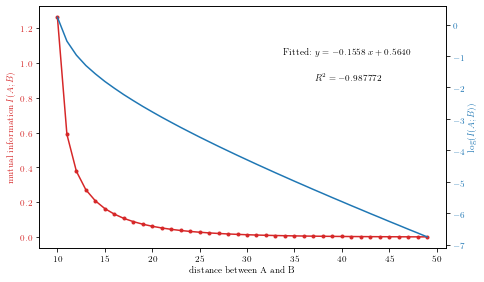

In [78]:
fig,ax1=plt.subplots(figsize=(6.8,4))

color = 'tab:red'
ax1.set_xlabel('distance between A and B')
ax1.set_ylabel(r'mutual information $I(A;B)$', color=color)
ax1.plot(dist_list,MI_list[mu],'.-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel(r'$\log(I(A;B))$', color=color)  
ax2.plot(dist_list,np.log(MI_list[mu]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

lr=scipy.stats.linregress(dist_list,np.log(MI_list[mu]))

ax2.text(.6,.8,r'Fitted: $y={:.4f}~x+{:.4f}$'.format(lr.slope,lr.intercept),transform=ax2.transAxes)
ax2.text(.68,.7,r'$R^2={:f}$'.format(lr.rvalue),transform=ax2.transAxes)

fig.tight_layout()


fig.savefig('/mnt/d/kitp/Rp_SPT/2/MI_mu0.pdf',bbox_inches='tight')


In [79]:
dist_list=np.arange(10,50)
mu=1
MI_list[mu]=[]
params=Params(mu=mu,Delta=0.05,L=400)
for dist in dist_list:
    MI_list[mu].append(params.mutual_information(np.arange(10),np.arange(dist,dist+10)))

/home/jake/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


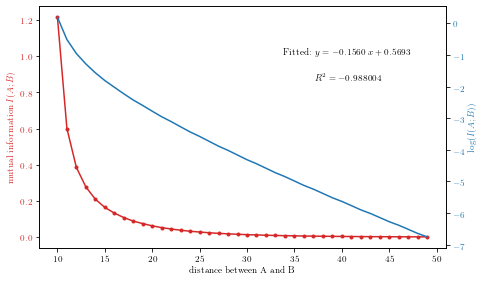

In [80]:
fig,ax1=plt.subplots(figsize=(6.8,4))

color = 'tab:red'
ax1.set_xlabel('distance between A and B')
ax1.set_ylabel(r'mutual information $I(A;B)$', color=color)
ax1.plot(dist_list,MI_list[mu],'.-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel(r'$\log(I(A;B))$', color=color)  
ax2.plot(dist_list,np.log(MI_list[mu]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

lr=scipy.stats.linregress(dist_list,np.log(MI_list[mu]))

ax2.text(.6,.8,r'Fitted: $y={:.4f}~x+{:.4f}$'.format(lr.slope,lr.intercept),transform=ax2.transAxes)
ax2.text(.68,.7,r'$R^2={:f}$'.format(lr.rvalue),transform=ax2.transAxes)

fig.tight_layout()


fig.savefig('/mnt/d/kitp/Rp_SPT/2/MI_mu1.pdf',bbox_inches='tight')


In [81]:
dist_list=np.arange(10,20)
mu=3
MI_list[mu]=[]
params=Params(mu=mu,Delta=0.05,L=400)
for dist in dist_list:
    MI_list[mu].append(params.mutual_information(np.arange(10),np.arange(dist,dist+10)))

/home/jake/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


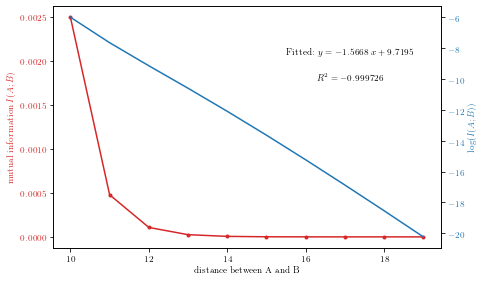

In [82]:
fig,ax1=plt.subplots(figsize=(6.8,4))

color = 'tab:red'
ax1.set_xlabel('distance between A and B')
ax1.set_ylabel(r'mutual information $I(A;B)$', color=color)
ax1.plot(dist_list,MI_list[mu],'.-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel(r'$\log(I(A;B))$', color=color)  
ax2.plot(dist_list,np.log(MI_list[mu]), color=color)
ax2.tick_params(axis='y', labelcolor=color)

lr=scipy.stats.linregress(dist_list,np.log(MI_list[mu]))

ax2.text(.6,.8,r'Fitted: $y={:.4f}~x+{:.4f}$'.format(lr.slope,lr.intercept),transform=ax2.transAxes)
ax2.text(.68,.7,r'$R^2={:f}$'.format(lr.rvalue),transform=ax2.transAxes)

fig.tight_layout()


fig.savefig('/mnt/d/kitp/Rp_SPT/2/MI_mu3.pdf',bbox_inches='tight')


In [83]:
dist_list=np.arange(10,50)
mu=2
MI_list[mu]=[]
params=Params(mu=mu,Delta=0.05,L=400)
for dist in dist_list:
    MI_list[mu].append(params.mutual_information(np.arange(10),np.arange(dist,dist+10)))

/home/jake/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


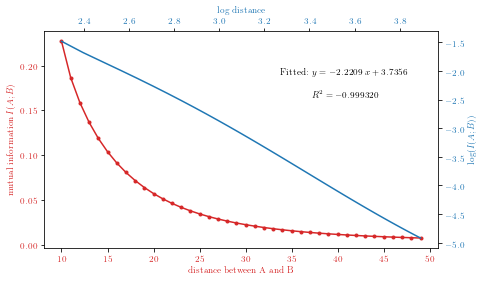

In [84]:
fig=plt.figure()
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2",frame_on=False)


color = 'tab:red'
ax1.set_xlabel('distance between A and B',color=color)
ax1.set_ylabel(r'mutual information $I(A;B)$', color=color)
ax1.plot(dist_list,MI_list[mu],'.-', color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.tick_params(axis='y', labelcolor=color)


color = 'tab:blue'

ax2.plot(np.log(dist_list),np.log(MI_list[mu]), color=color)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xlabel(r'log distance', color=color) 
ax2.set_ylabel(r'$\log(I(A;B))$', color=color)  
ax2.tick_params(axis='x', labelcolor=color)
ax2.tick_params(axis='y', labelcolor=color)

lr=scipy.stats.linregress(np.log(dist_list),np.log(MI_list[mu]))

ax2.text(.6,.8,r'Fitted: $y={:.4f}~x+{:.4f}$'.format(lr.slope,lr.intercept),transform=ax2.transAxes)
ax2.text(.68,.7,r'$R^2={:f}$'.format(lr.rvalue),transform=ax2.transAxes)

fig.tight_layout()


fig.savefig('/mnt/d/kitp/Rp_SPT/2/MI_mu2.pdf',bbox_inches='tight')


# Class

In [ ]:
class Params:
    '''
    example: params=Params(mu=2)
    '''
    def __init__(self,
    mu=1,
    t=1,
    Delta=1,
    L=100,
    T=0,
    pbc=True):
        self.mu=mu
        self.t=t
        self.Delta=Delta
        self.L=L
        self.tau_z=sp.dia_matrix(np.diag([1,-1]))
        self.tau_y=sp.dia_matrix(np.array([[0,-1j],[1j,0]]))
        self.pbc=pbc
        self.T=T
        self.band1sm=sp.diags([1],[1],(L,L)).tocsr()
        self.bandm1sm=sp.diags([1],[-1],(L,L)).tocsr()
        self.band1sm[-1,0]=1*(pbc)
        self.bandm1sm[0,-1]=1*(pbc)
        self.Hamiltonian=-self.mu*sp.kron(self.tau_z,sp.identity(self.L))-sp.kron(self.t*self.tau_z+1j*self.Delta*self.tau_y,self.band1sm)-sp.kron(self.t*self.tau_z-1j*self.Delta*self.tau_y,self.bandm1sm)
    
    def bandstructure(self):        
        val,vec=la.eigh(self.Hamiltonian.toarray())
        sortindex=np.argsort(val)
        self.val=val[sortindex]
        self.vec=vec[:,sortindex]

    def fermi_dist(self,energy,E_F):      
        if self.T==0:
            return np.heaviside(E_F-energy,0)
        else:
            return 1/(1+np.exp((energy-E_F)/self.T)) 


    def covariance_matrix(self,E_F=0):
        if not (hasattr(self,'val') and hasattr(self,'vec')):
            self.bandstructure()
        occupancy=self.fermi_dist(self.val,E_F)
        occupancy_mat=np.matlib.repmat(self.fermi_dist(self.val,E_F),self.vec.shape[0],1)
        self.C=np.real((occupancy_mat*self.vec)@self.vec.T.conj())

    def c_subregion(self,subregion):
        if not hasattr(self,'C'):
            self.covariance_matrix()
        XX,YY=np.meshgrid(np.arange(2*self.L),np.arange(2*self.L))
        mask_hh=np.isin(XX,subregion)*np.isin(YY,subregion)
        mask_hp=np.isin(XX,subregion)*np.isin(YY,subregion+self.L)
        mask_ph=np.isin(XX,subregion+self.L)*np.isin(YY,subregion)
        mask_pp=np.isin(XX,subregion+self.L)*np.isin(YY,subregion+self.L)
        mask=mask_hh+mask_hp+mask_ph+mask_pp
        return self.C[mask].reshape((2*subregion.shape[0],2*subregion.shape[0]))

    def shannon_entropy(self,subregion):
        c_A=self.c_subregion(subregion)
        val,vec=la.eigh(c_A)
        self.val_sh=val
        val=np.sort(val)[:subregion.shape[0]]
        return np.real(-np.sum(val*np.log(val+1e-18j))-np.sum((1-val)*np.log(1-val+1e-18j)))

    def mutual_information(self,subregion_A,subregion_B):
        s_A=self.shannon_entropy(subregion_A)
        s_B=self.shannon_entropy(subregion_B)
        subregion_AB=np.hstack([subregion_A,subregion_B])
        s_AB=self.shannon_entropy(subregion_AB)
        return s_A+s_B-s_AB
    

# Test

In [40]:
params=Params(mu=0,L=200,Delta=0.1)

In [41]:
params.covariance_matrix(0)

In [42]:
params.shannon_entropy(np.arange(50))

1.2367968869128296

In [10]:
params.val_sh

array([0.01298925, 0.05531669, 0.94468331, 0.98701075])

In [116]:
params.mutual_information(np.arange(2),np.arange(2)+10)

4.7860059782522946e-05

In [117]:
params.mutual_information(np.arange(2),np.arange(2)+20)

7.179432937043373e-09

In [120]:
params.mutual_information(np.arange(2),np.arange(2)+50)

1.2989609388114332e-14

In [11]:
np.log(params.val_sh/(1-params.val_sh))

array([-4.33055857, -2.83777501,  2.83777501,  4.33055857])

In [89]:
params.val_sh[0]+params.val_sh[-1]

0.998320705473697

In [90]:
params.val_sh[1]+params.val_sh[-2]

0.9816792945263035

In [92]:
z=params.c_subregion(np.arange(2))

In [93]:
z

array([[ 8.13283706e-01,  1.11129481e-01,  6.20482392e-17,
         2.12154225e-01],
       [ 1.11129481e-01,  8.13283706e-01, -2.12154225e-01,
        -1.36907625e-16],
       [ 6.20482392e-17, -2.12154225e-01,  1.76716294e-01,
        -1.01129481e-01],
       [ 2.12154225e-01, -1.36907625e-16, -1.01129481e-01,
         1.76716294e-01]])

In [52]:
z[2:2+2,2:2+2]

array([[ 0.5 , -0.25],
       [-0.25,  0.5 ]])

In [56]:
z[:2,2:2+2]

array([[ 0.00000000e+00,  2.50000000e-01],
       [-2.50000000e-01, -1.91753388e-17]])

In [57]:
z[2:2+2,:2]

array([[ 0.00000000e+00, -2.50000000e-01],
       [ 2.50000000e-01, -1.91753388e-17]])

In [46]:
params.C[:2,:2]

array([[0.5 , 0.25],
       [0.25, 0.5 ]])

In [50]:
params.C[params.L:params.L+2,params.L:params.L+2]

array([[ 0.5 , -0.25],
       [-0.25,  0.5 ]])

In [53]:
params.C[:2,params.L:params.L+2]

array([[ 0.00000000e+00,  2.50000000e-01],
       [-2.50000000e-01, -1.91753388e-17]])

In [54]:
params.C[params.L:params.L+2,:2]

array([[ 0.00000000e+00, -2.50000000e-01],
       [ 2.50000000e-01, -1.91753388e-17]])

(80.0, 120.0, 80.0, 120.0)

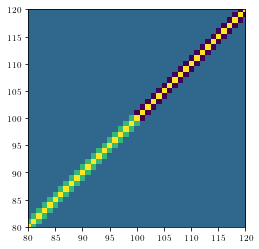

In [33]:
plt.imshow(params.C)
plt.axis([80,120,80,120])

In [8]:
mulist=np.linspace(0,4,50)
eigvallist=[]
for mu in mulist:
    params=Params(mu=mu,n=100)
    params.bandstructure()
    eigvallist.append(params.val)

/home/jake/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [13]:
mulist=np.linspace(0,4,50)
eigvallist2=[]
for mu in mulist:
    params=Params(mu=mu,n=100,pbc=False)
    params.bandstructure()
    eigvallist2.append(params.val)

/home/jake/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


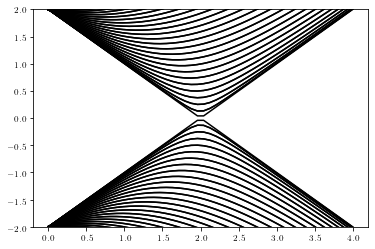

In [9]:
fig,ax=plt.subplots()
for index in range(eigvallist[0].shape[0]):
    ax.plot(mulist,np.array(eigvallist)[:,index],'k')
    ax.set_ylim([-2,2])


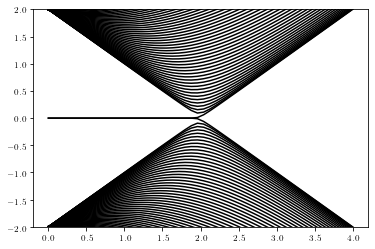

In [14]:
fig,ax=plt.subplots()
for index in range(eigvallist2[0].shape[0]):
    ax.plot(mulist,np.array(eigvallist2)[:,index],'k')
    ax.set_ylim([-2,2])
